### Importing Libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as gp
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

### Input Diabetes Dataset

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Locate Missing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1                       False  False    False  
2                       False  False    False  
3                       False  False    False  
4                       False  False    False  
..                        ...    ...      ...  
763                     False  False    False  
764                     False  False    False  
765                     False  False    False  
766                     False  False    False  
767                     False  False    False  

[768 rows x 9 columns]

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Check for Duplicates

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
# Get the shape of the dataframe
df.shape

(768, 9)

In [8]:
# Check for NaN values in Name
df.query(''' `Pregnancies`.isna() ''')

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

### Detect Outliers

In [9]:
# Describing the statistics of the dataset column by column
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

count        mean         std     min     10%  \
Pregnancies               768.0    3.845052    3.369578   0.000   0.000   
Glucose                   768.0  120.894531   31.972618   0.000  85.000   
BloodPressure             768.0   69.105469   19.355807   0.000  54.000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.000   
Insulin                   768.0   79.799479  115.244002   0.000   0.000   
BMI                       768.0   31.992578    7.884160   0.000  23.600   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.165   
Age                       768.0   33.240885   11.760232  21.000  22.000   
Outcome                   768.0    0.348958    0.476951   0.000   0.000   

                               25%       50%        75%       90%        95%  \
Pregnancies                1.00000    3.0000    6.00000    9.0000   10.00000   
Glucose                   99.00000  117.0000  140.25000  167.0000  181.00000   
BloodPressure             62.00000   72.0000   80.00000   88.0000   90.00000   
SkinThickness              0.00000   23.0000   32.00000   40.0000   44.00000   
Insulin                    0.00000   30.5000  127.25000  210.0000  293.00000   
BMI                       27.30000   32.0000   36.60000   41.5000   44.39500   
DiabetesPedigreeFunction   0.24375    0.3725    0.62625    0.8786    1.13285   
Age                       24.00000   29.0000   41.00000   51.0000   58.00000   
Outcome                    0.00000    0.0000    1.00000    1.0000    1.00000   

                                99%     max  
Pregnancies                13.00000   17.00  
Glucose                   196.00000  199.00  
BloodPressure             106.00000  122.00  
SkinThickness              51.33000   99.00  
Insulin                   519.90000  846.00  
BMI                        50.75900   67.10  
DiabetesPedigreeFunction    1.69833    2.42  
Age                        67.00000   81.00  
Outcome                     1.00000    1.00

### Taking a look at the Outcome column

In [11]:
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [12]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Checking the Age column visually for irregularity

<Axes: >

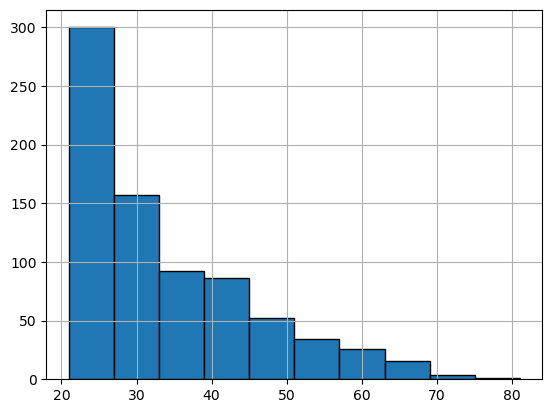

In [13]:
df["Age"].hist(edgecolor = "black")

### Using a histogram plot for all columns against the Outcome column

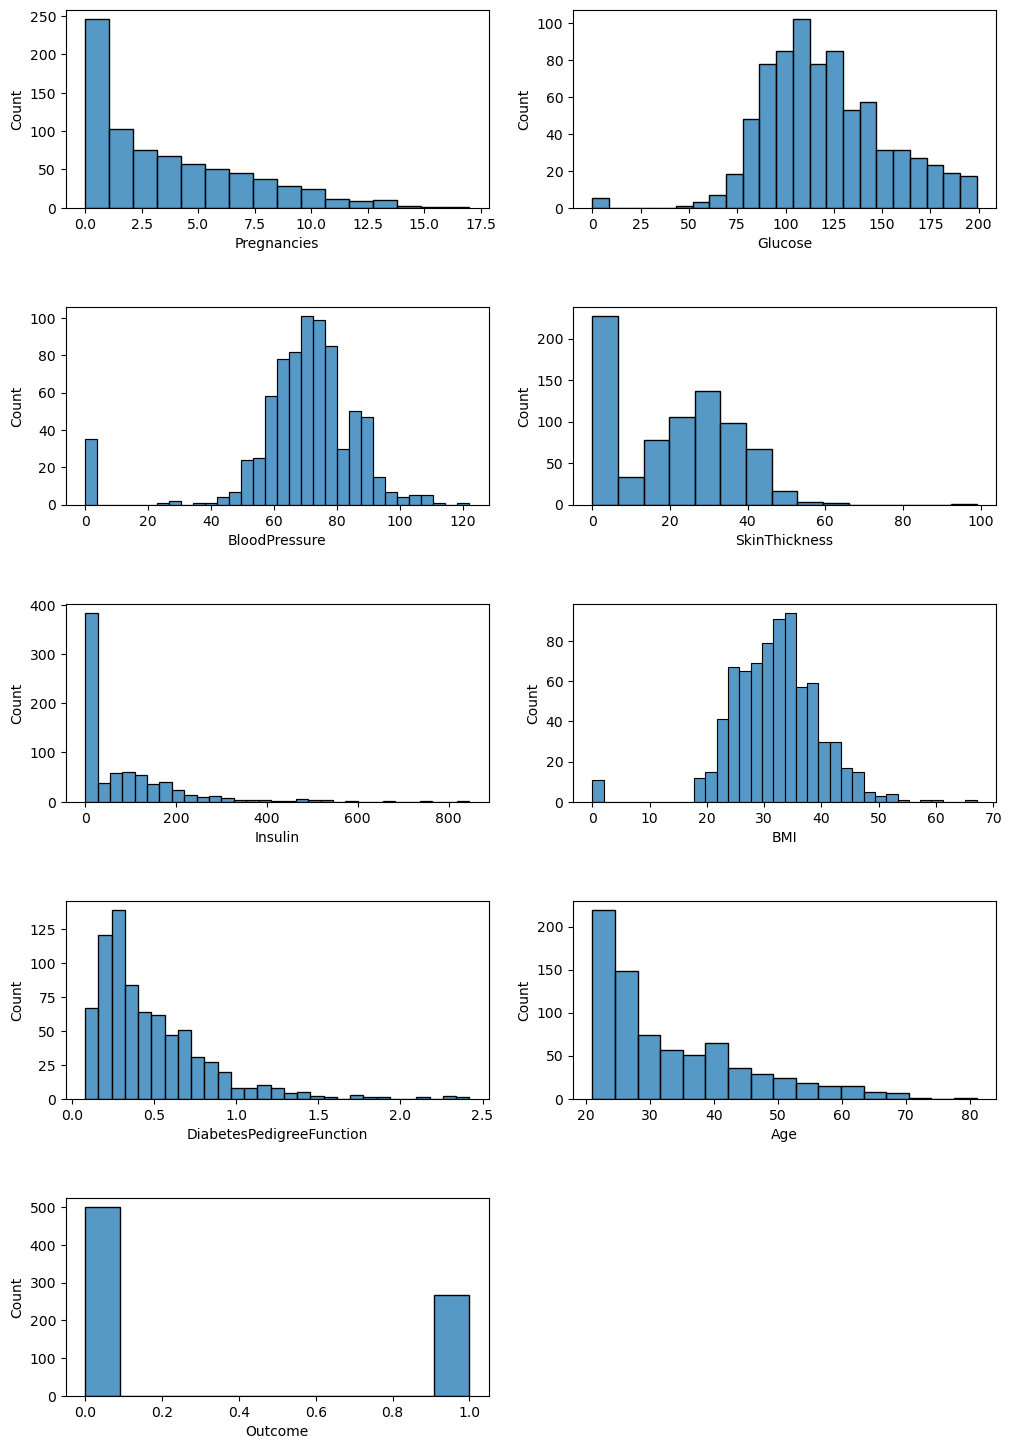

In [14]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, 
                )
    i += 1

### Values that should not be zero includes Glucose, BloodPressure, SkinThickness, Insulin and BMI

In [15]:
# replacing all such values that should not be zero with NaN
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [16]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Looking for outliers

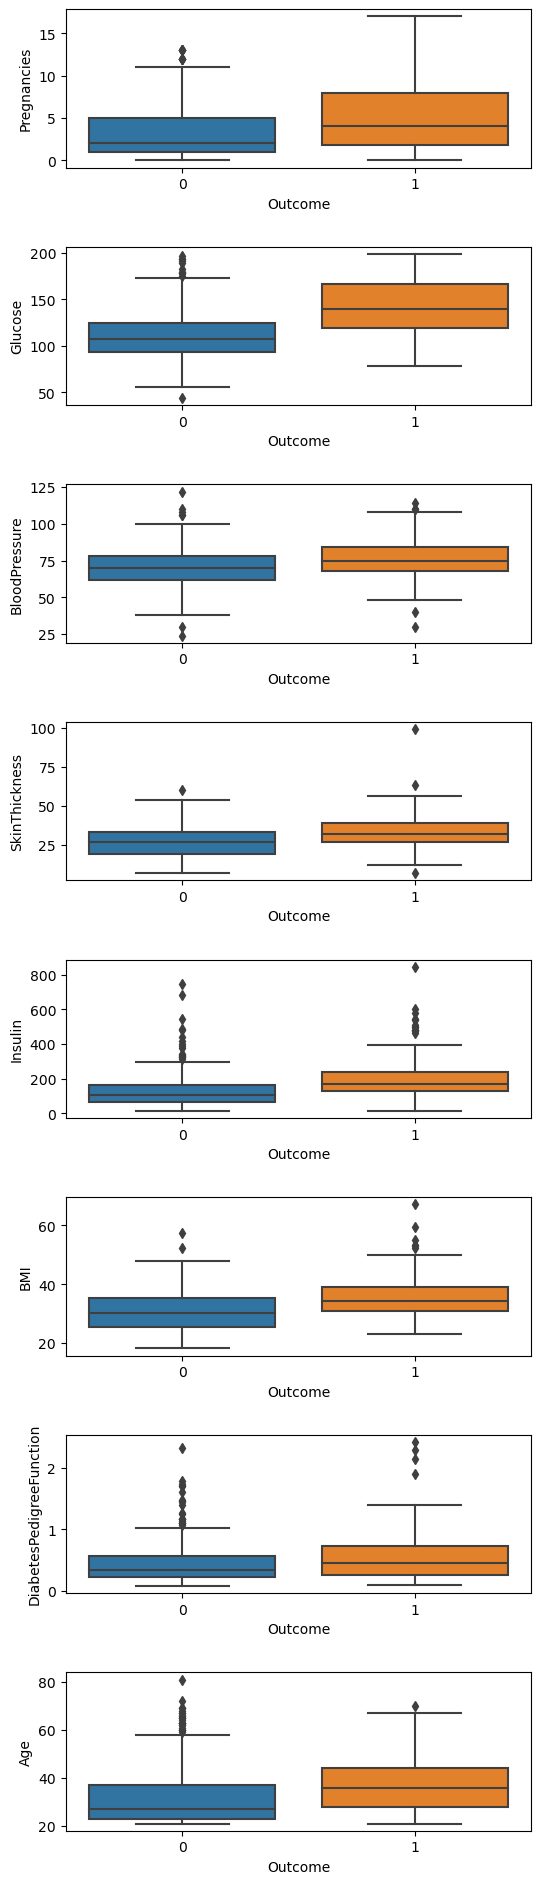

In [17]:
plt.figure(figsize=(6,36))
plt.subplots_adjust(hspace=0.5)

i = 1
for col_name in df.columns.drop('Outcome'):
    plt.subplot(12,1,i)
    sns.boxplot(data=df, x='Outcome', y=col_name)
    i +=1
    


### Showing the Number of Outliers

In [18]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 1.5*iqr
upper = df.quantile(0.75) + 1.5*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()

Number of outliers


Pregnancies                  4
Glucose                      0
BloodPressure               14
SkinThickness                3
Insulin                     24
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### Showing the Number of extreme Outliers

In [19]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of extreme outliers")
((df < lower) + (df > upper)).sum()

Number of extreme outliers


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     8
BMI                         1
DiabetesPedigreeFunction    6
Age                         0
Outcome                     0
dtype: int64

In [20]:
df[(df['Outcome'] == 0)].quantile(0.5)

Pregnancies                   2.000
Glucose                     107.000
BloodPressure                70.000
SkinThickness                27.000
Insulin                     102.500
BMI                          30.100
DiabetesPedigreeFunction      0.336
Age                          27.000
Outcome                       0.000
Name: 0.5, dtype: float64

In [21]:
df[(df['Outcome'] == 1)].quantile(0.5)

Pregnancies                   4.000
Glucose                     140.000
BloodPressure                74.500
SkinThickness                32.000
Insulin                     169.500
BMI                          34.300
DiabetesPedigreeFunction      0.449
Age                          36.000
Outcome                       1.000
Name: 0.5, dtype: float64

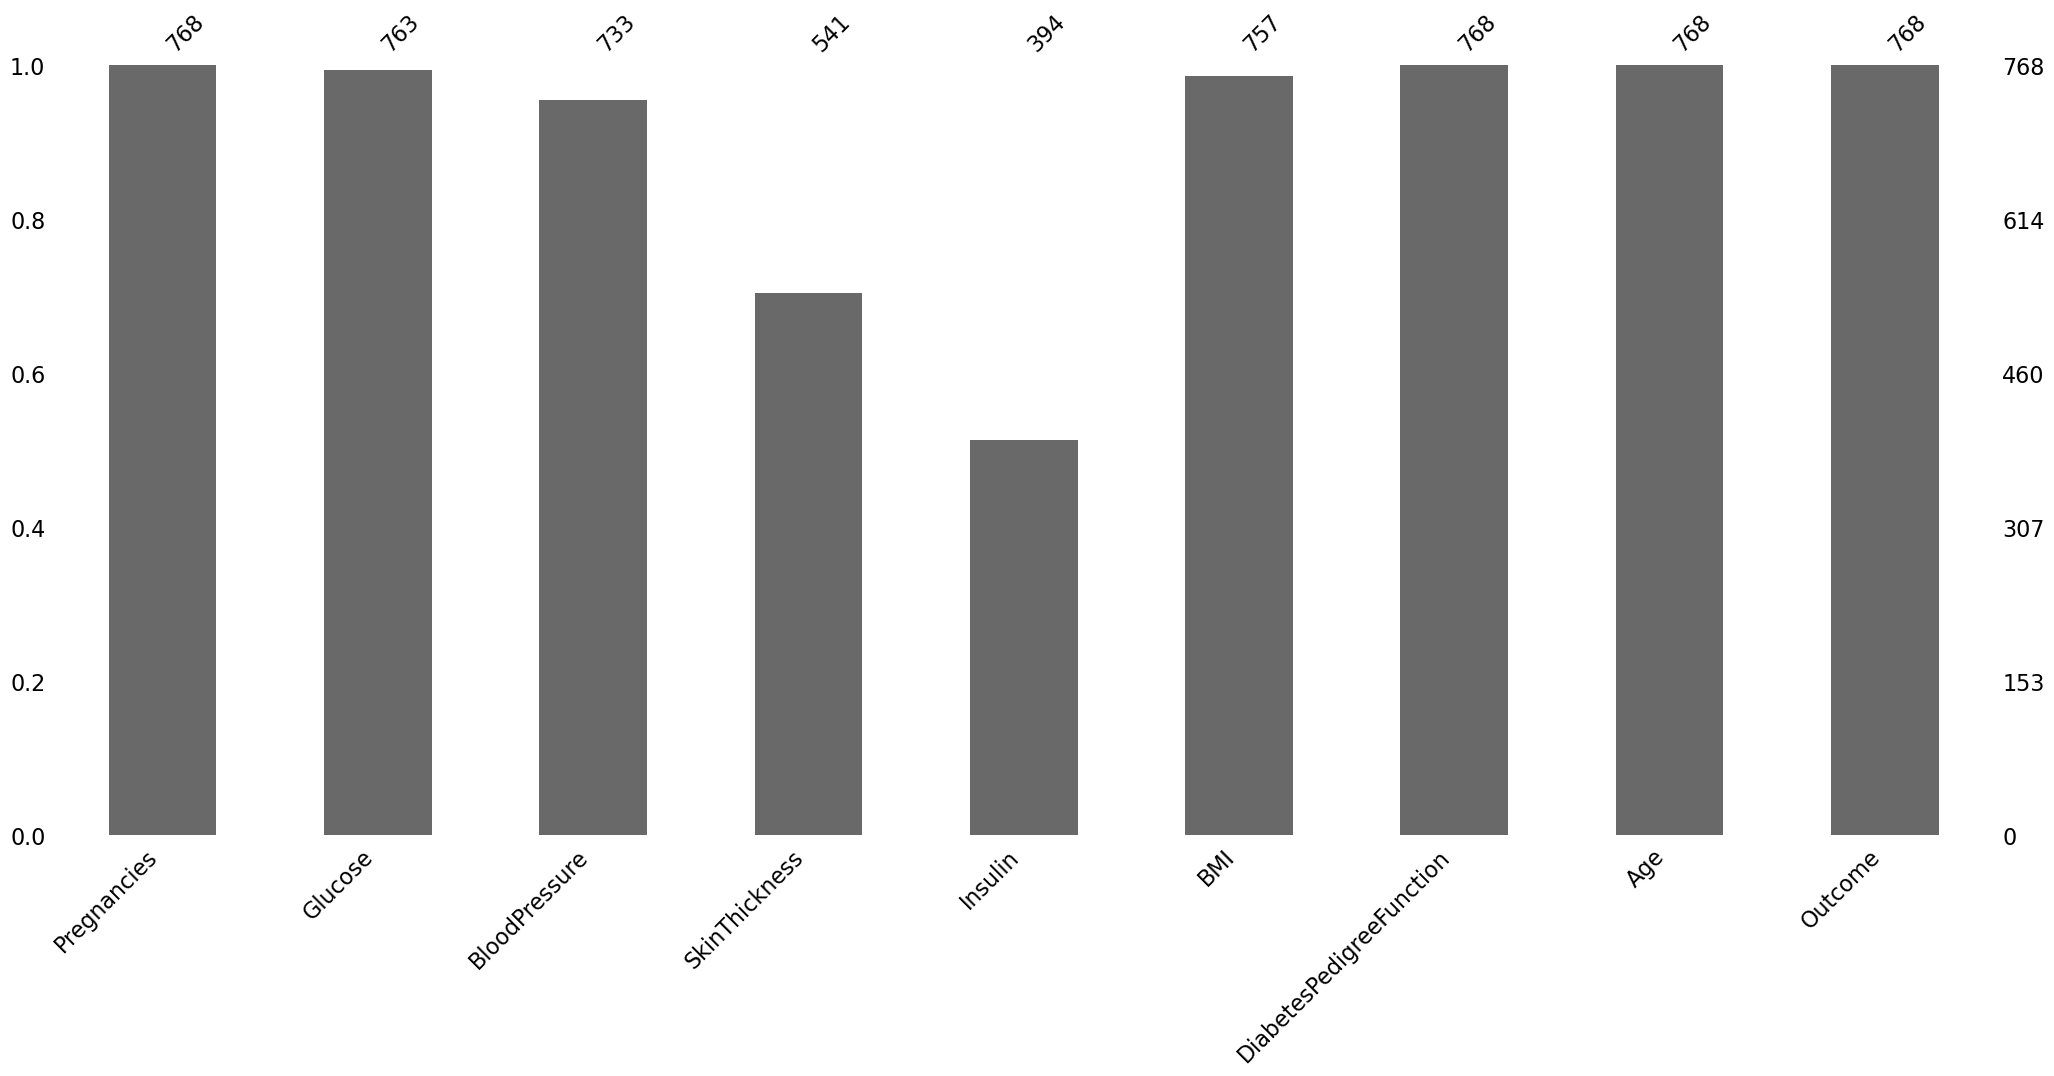

In [22]:
import missingno as msno
msno.bar(df);

### Imputation of median for Nan Values

In [23]:
median_fulldata = df.groupby('Outcome').agg('median')
dp = df.copy()

# Leak imputation
for col in df.columns.drop('Outcome'):
    df.loc[((df[col].isnull()) & (df['Outcome'] == 0)),col] = median_fulldata[col][0]
    df.loc[((df[col].isnull()) & (df['Outcome'] == 1)),col] = median_fulldata[col][1]

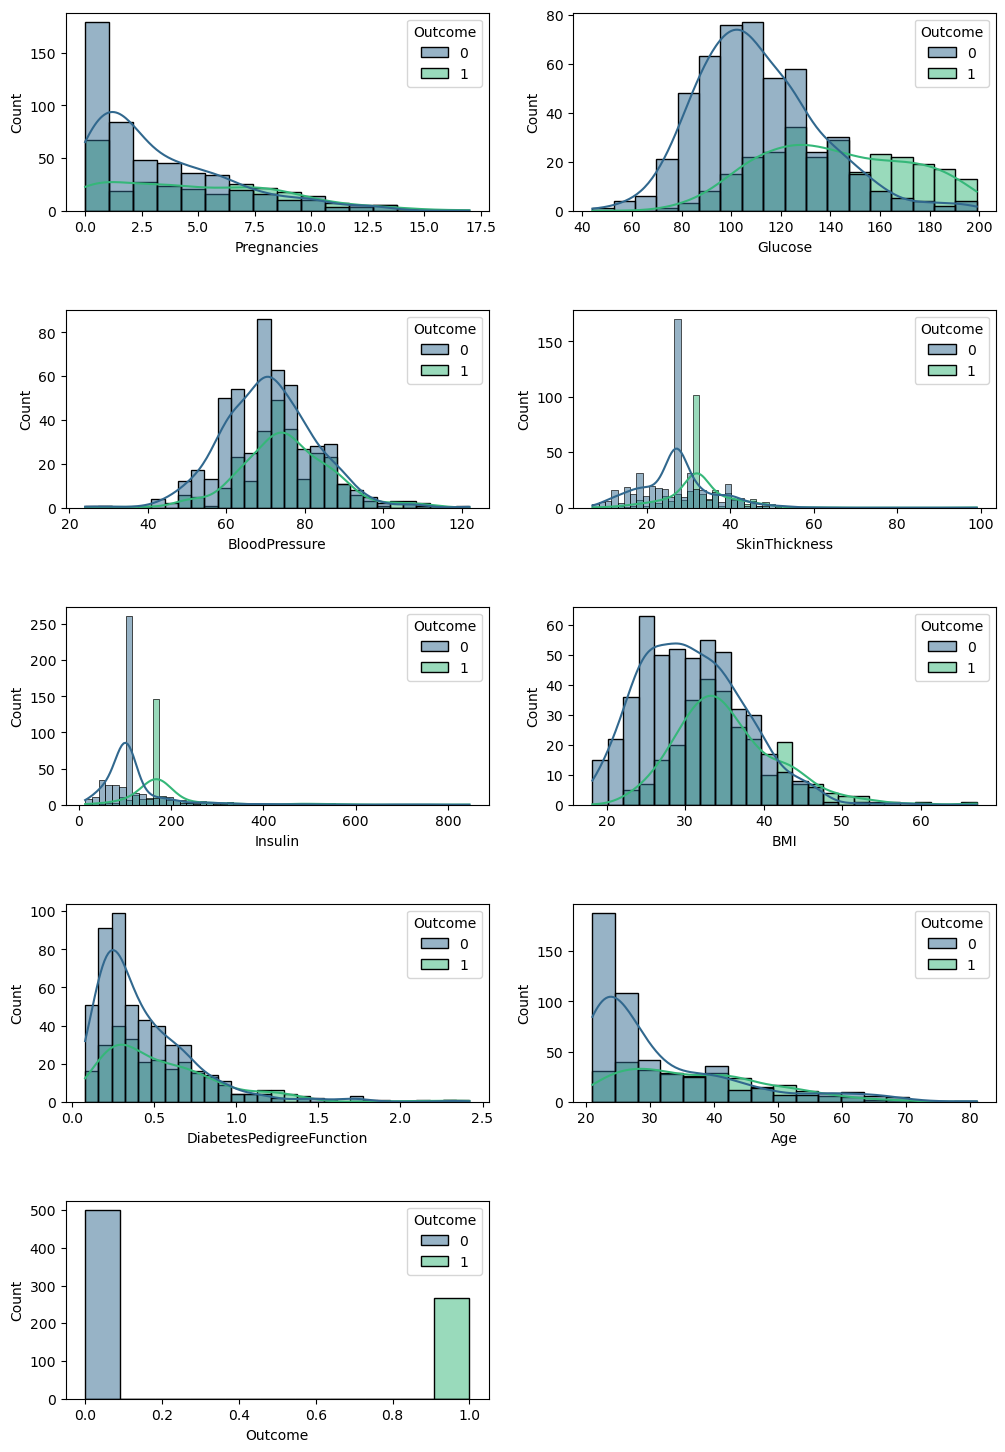

In [24]:
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=col_name, kde=True, hue='Outcome', multiple='layer', alpha=0.5, palette='viridis')
    i += 1

In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Using Principal Component Analysis

In [27]:
# Standardize Data
scaler = StandardScaler()                # Create Scaler
data_scaled = scaler.fit_transform(df)   # Fit scaler
print(data_scaled)                       # Print scaler

[[ 0.63994726  0.86462486 -0.03218035 ...  0.46849198  1.4259954
   1.36589591]
 [-0.84488505 -1.20472661 -0.52812374 ... -0.36506078 -0.19067191
  -0.73212021]
 [ 1.23388019  2.01426457 -0.69343821 ...  0.60439732 -0.10558415
   1.36589591]
 ...
 [ 0.3429808  -0.02224005 -0.03218035 ... -0.68519336 -0.27575966
  -0.73212021]
 [-0.84488505  0.14199419 -1.02406713 ... -0.37110101  1.17073215
   1.36589591]
 [-0.84488505 -0.94195182 -0.19749482 ... -0.47378505 -0.87137393
  -0.73212021]]


In [28]:
# Print Standardized Data in DataFrame Format since the data_scaled is returned as a numpy array
DF_scaled = pd.DataFrame(data = data_scaled,                           # Create DataFrame DF_scaled
                         columns = df.keys().values)
DF_scaled.head(6)                                                      # Print first 6 rows of DF_scaled


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.864625      -0.032180       0.665181  0.311604  0.169483   
1    -0.844885 -1.204727      -0.528124      -0.010112 -0.440843 -0.848549   
2     1.233880  2.014265      -0.693438       0.327535  0.311604 -1.328478   
3    -0.844885 -1.073339      -0.528124      -0.685405 -0.536303 -0.630399   
4    -1.141852  0.503310      -2.677212       0.665181  0.294758  1.551096   
5     0.342981 -0.186474       0.133134      -0.235210 -0.440843 -0.993982   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  
5                 -0.818079 -0.275760 -0.732120

### To Decide the Ideal Component Number

In [29]:
# Ideal Number of Components
pca = PCA(n_components = 9)                 # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(DF_scaled)     # Transform data
print(pca_trans)                             # Print transformed data
print(pca_trans.shape)                       # Print dimensions of transformed data

[[ 2.01234432e+00 -6.04475584e-01  5.28323628e-01 ...  5.52126102e-01
   3.68735203e-01  2.42446368e-01]
 [-1.75816929e+00  1.16621533e-01 -2.67951235e-01 ...  3.40652592e-01
   8.09903728e-01 -7.92101850e-02]
 [ 1.34196280e+00 -4.30131841e-01  2.02861714e+00 ...  6.59622433e-01
  -7.28404440e-01 -1.35155318e+00]
 ...
 [-1.12625217e+00 -8.15591715e-01  2.56256023e-01 ...  2.20143337e-04
  -4.13521958e-01 -3.84305648e-01]
 [ 5.45942045e-01  1.09957213e-01  8.72235842e-01 ...  9.01247419e-01
   1.30969252e+00  7.98234755e-01]
 [-1.49864271e+00  6.53114594e-01 -7.03627385e-01 ...  7.19953020e-02
   3.44296493e-01 -2.97006667e-01]]
(768, 9)


In [30]:
prop_var = pca.explained_variance_ratio_     # Extract proportion of explained variance
print(prop_var)                              # Print proportion of explained variance

[0.30905393 0.16729967 0.12939774 0.1013636  0.0857601  0.06524608
 0.05526051 0.04483172 0.04178666]


In [31]:
PC_number = np.arange(pca.n_components_) + 1 # Enumarate component numbers
print(PC_number)                             # Print component numbers

[1 2 3 4 5 6 7 8 9]


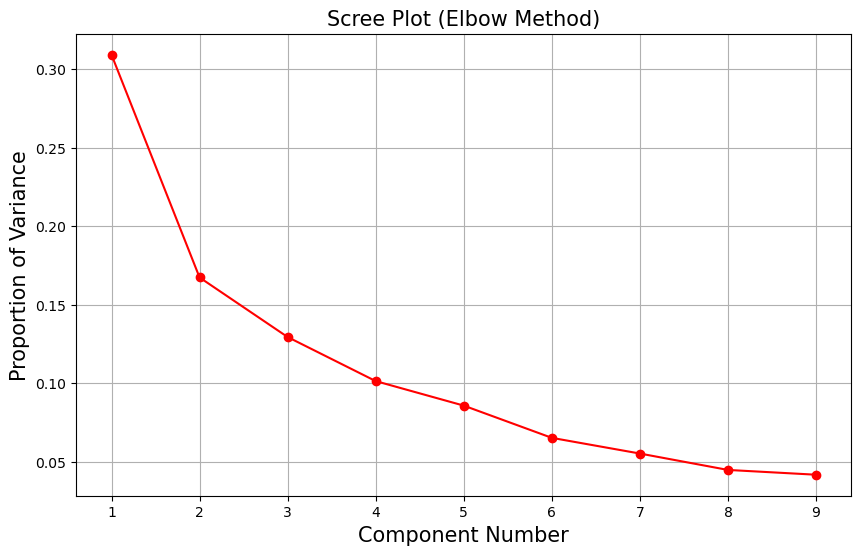

In [32]:
# Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         prop_var,
         'ro-')                             # red solid line with circle markers
plt.title('Scree Plot (Elbow Method)',      # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance',
           fontsize = 15)
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph

#### Normally using the elbow method, the user is meant to select the components just before the line flattens out

#### Kaiser method can be used which suggests keeping components explaining data variation greater than 1

In [33]:
# Alternative Scree Plot Data
var = pca.explained_variance_                # Extract explained variance
print(var)                                   # Print explained variance

[2.78511185 1.50766014 1.16609802 0.91346179 0.77284717 0.58798028
 0.49799302 0.40401153 0.37657023]


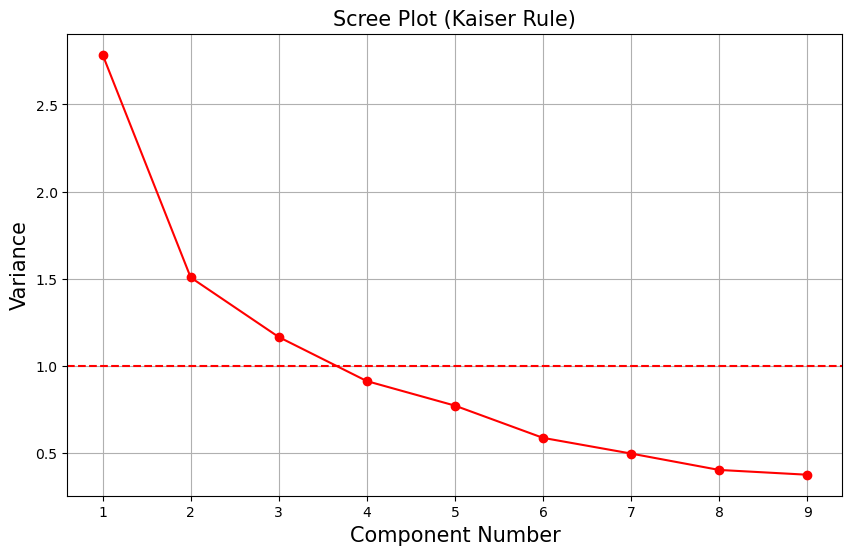

In [34]:
# Alternative Scree Plot
plt.figure(figsize=(10, 6))                 # Set figure and size
plt.plot(PC_number,                         # Plot prop var
         var,
         'ro-')
plt.title('Scree Plot (Kaiser Rule)',       # Plot Annotations
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Variance',
           fontsize = 15)
plt.axhline(y = 1,                          # Plot horizontal line
           color = 'r',
           linestyle='--')
plt.grid()                                  # Add grid lines
plt.show()                                  # Print graph

#### Based on this graph above, 3 components are ideal to keep

In [35]:
# Perform PCA forming 3 PCs
pca = PCA(n_components = 3)         # Create PCA objects forming 3 components
PC = pca.fit_transform(DF_scaled)   # Transform data
print(PC)                           # Print transformed data
print(PC.shape)                     # Print the dimension of transformed data

[[ 2.01234432 -0.60447558  0.52832363]
 [-1.75816929  0.11662153 -0.26795123]
 [ 1.3419628  -0.43013184  2.02861714]
 ...
 [-1.12625217 -0.81559171  0.25625602]
 [ 0.54594204  0.10995721  0.87223584]
 [-1.49864271  0.65311459 -0.70362739]]
(768, 3)


In [36]:
# Biplot Data
PC1 = PC[:, 0]                              # Extract PC1
PC2 = PC[:, 1]                              # Extract PC2
PC3 = PC[:, 2]                              # Extract PC3

In [37]:
loadings = pca.components_                  # Extract loadings
print(loadings)                             # Print loadings
print(loadings.shape)                       # Loading shape

[[ 0.24319353  0.42141852  0.29086395  0.35490014  0.34825241  0.35938891
   0.15622472  0.30688331  0.4285834 ]
 [-0.58236878  0.06303707 -0.22910272  0.24971756  0.20951108  0.33982951
   0.2585765  -0.55791506  0.06720123]
 [-0.01556645  0.36431787 -0.39437393 -0.45718196  0.4332788  -0.45996772
   0.22425457  0.02868602  0.22818897]]
(3, 9)


In [38]:
# Scaling Vector
scalePC1 = 1.0/(PC1.max() - PC1.min())       # Create min-max scale for PC1
print(scalePC1)                              # Print scalePC1

scalePC2 = 1.0/(PC2.max() - PC2.min())       # Create min-max scale for PC2
print(scalePC2)                              # Print scalePC2

scalePC3 = 1.0/(PC3.max() - PC3.min())       # Create min-max scale for PC3
print(scalePC3)                              # Print scalePC3

0.11301888503337494
0.11621996038231337
0.10395096835376705


In [39]:
features = df.keys().values   # Feature/Variable names
print(features)   

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [40]:
type(features)

numpy.ndarray

### PC1 vs PC2

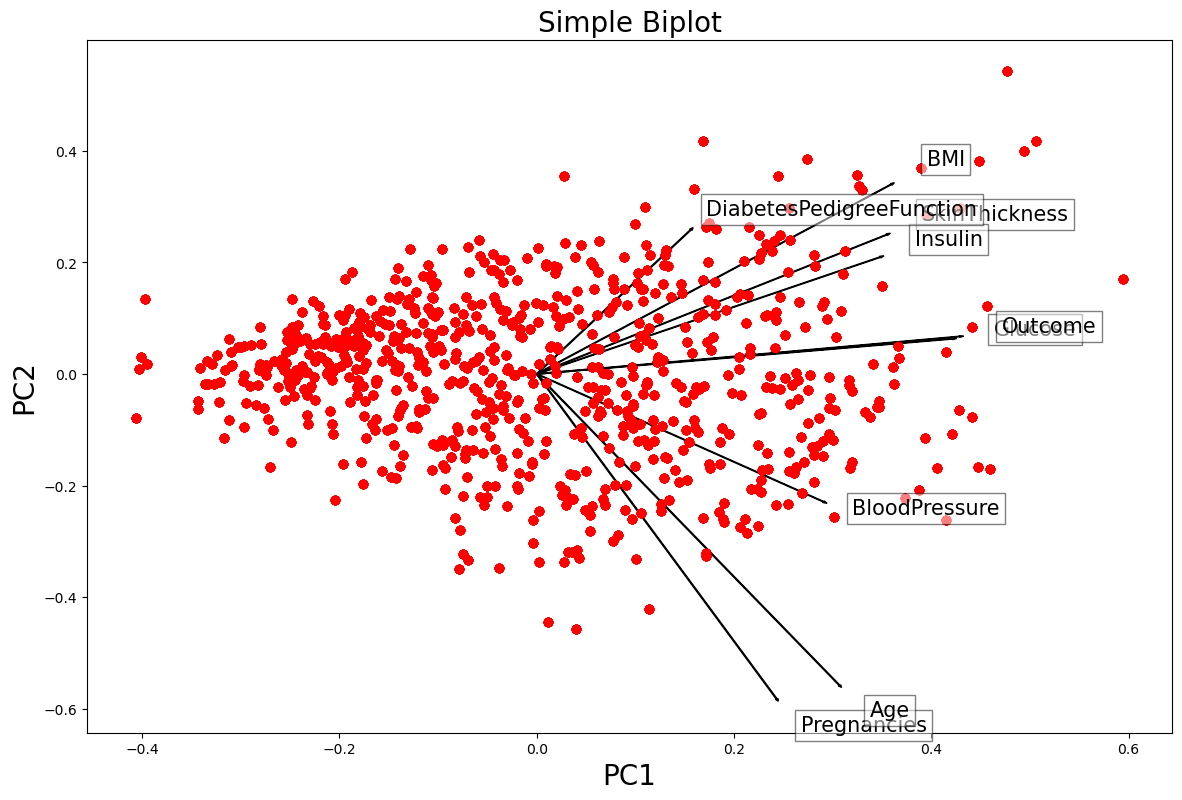

In [41]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC2 * scalePC2, 
               c='r', marker='o')  
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC2',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

### PC1 vs PC3

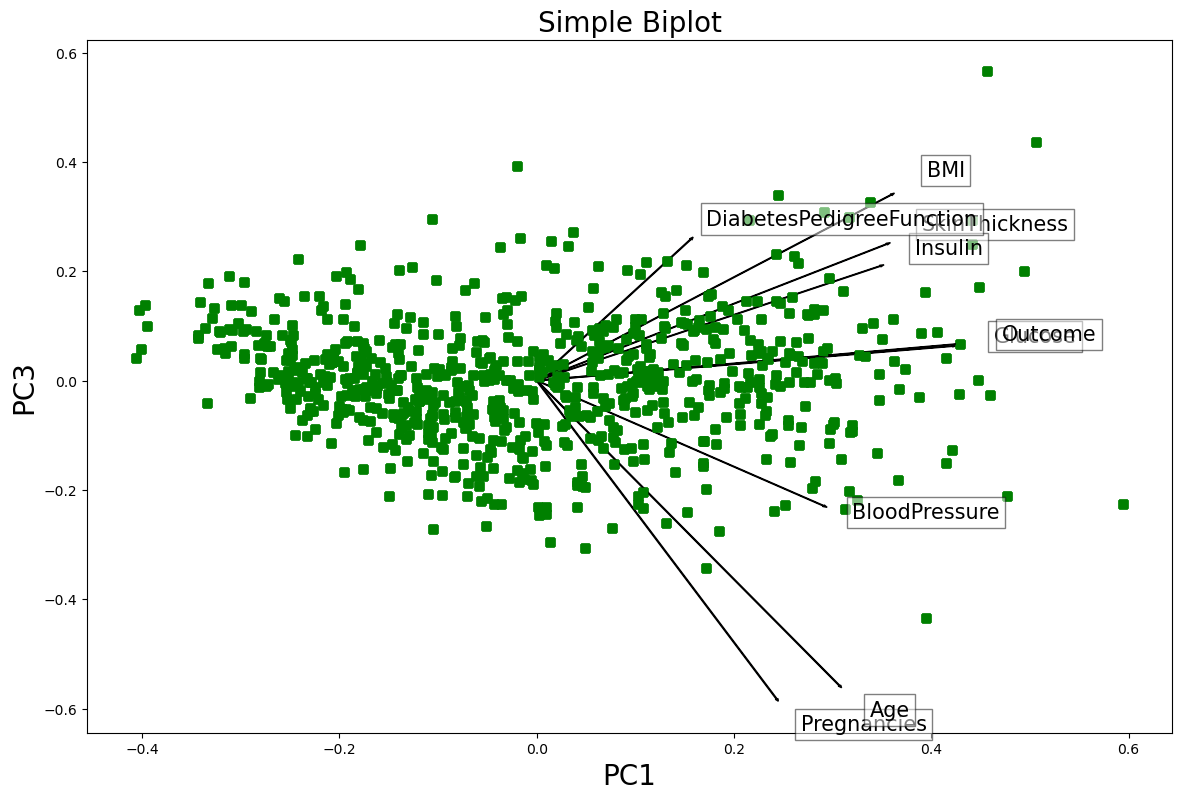

In [42]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    ax.scatter(PC1 * scalePC1,               # Plot data points
               PC3 * scalePC3, 
               c='g', marker='s')
    
    ax.set_xlabel('PC1',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

### PC2 vs PC3

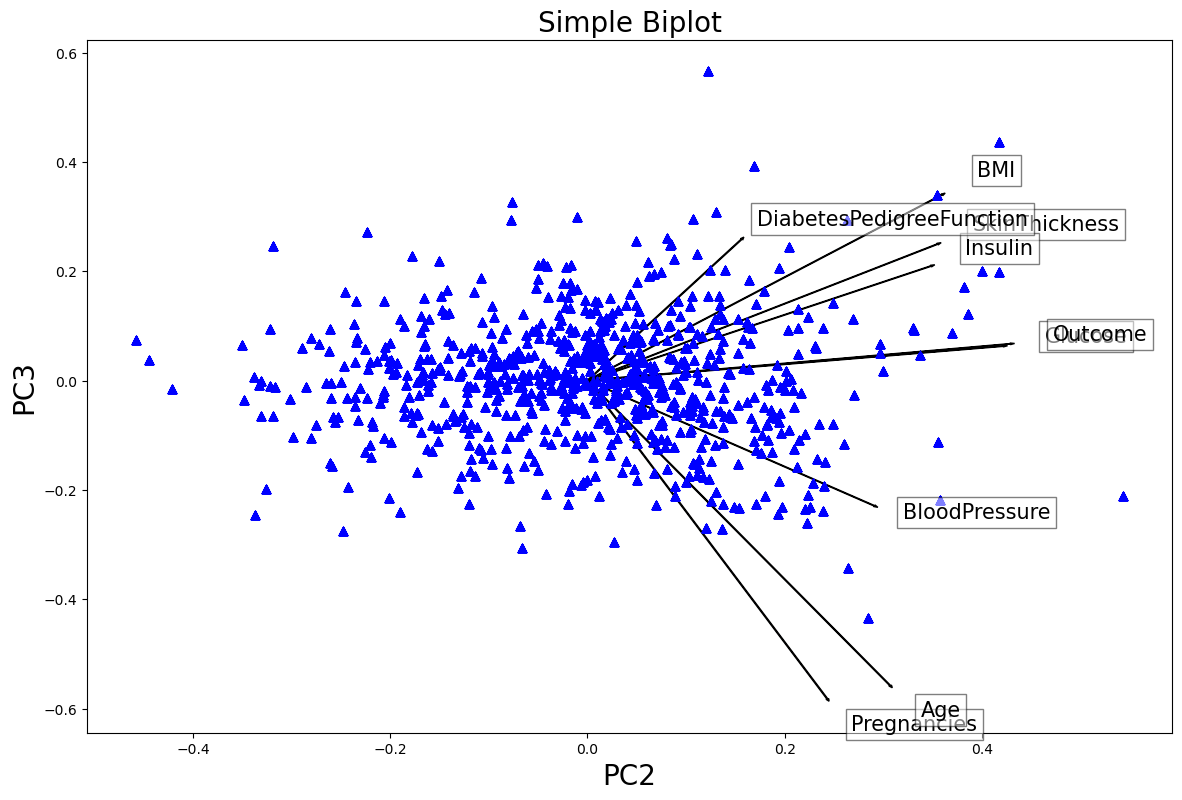

In [43]:
# Simple Biplots
fig, ax = plt.subplots(figsize=(14, 9))        # Set figure and size


for i, feature in enumerate(features):        # Iterate over features/variables
    ax.arrow(0,                               # Plot arrows
            0,
            loadings[0, i],
            loadings[1, i])
    
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, feature, fontsize=15, bbox=dict(facecolor='white', alpha=0.5)) # Plot arrow text
    
    
    ax.scatter(PC2 * scalePC2,                # Plot data points
               PC3 * scalePC3, 
               c='b', marker='^')
    
    ax.set_xlabel('PC2',                      # Add annotations
                 fontsize = 20)
    ax.set_ylabel('PC3',
                 fontsize = 20)
    ax.set_title('Simple Biplot',             # Add title
                fontsize = 20)
    

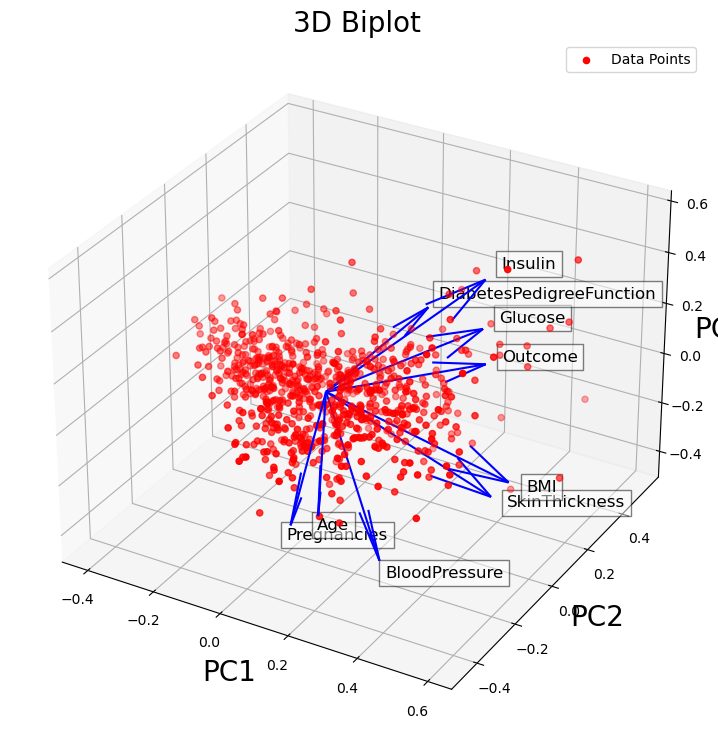

In [44]:
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

for i, feature in enumerate(features):
    ax.quiver(0, 0, 0,  # Plot arrows in 3D
              loadings[0, i],
              loadings[1, i],
              loadings[2, i],
              color='b')
    
    # Adjust the label position to avoid overlap
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    label_z = loadings[2, i] * 1.1
    
    # Add a bounding box around the text to prevent overlap
    ax.text(label_x, label_y, label_z, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Scatter plot for data points in 3D
ax.scatter(PC1 * scalePC1, PC2 * scalePC2, PC3 * scalePC3, c='r', marker='o', label='Data Points')

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_zlabel('PC3', fontsize=20)
ax.set_title('3D Biplot', fontsize=20)

plt.legend()
plt.show()

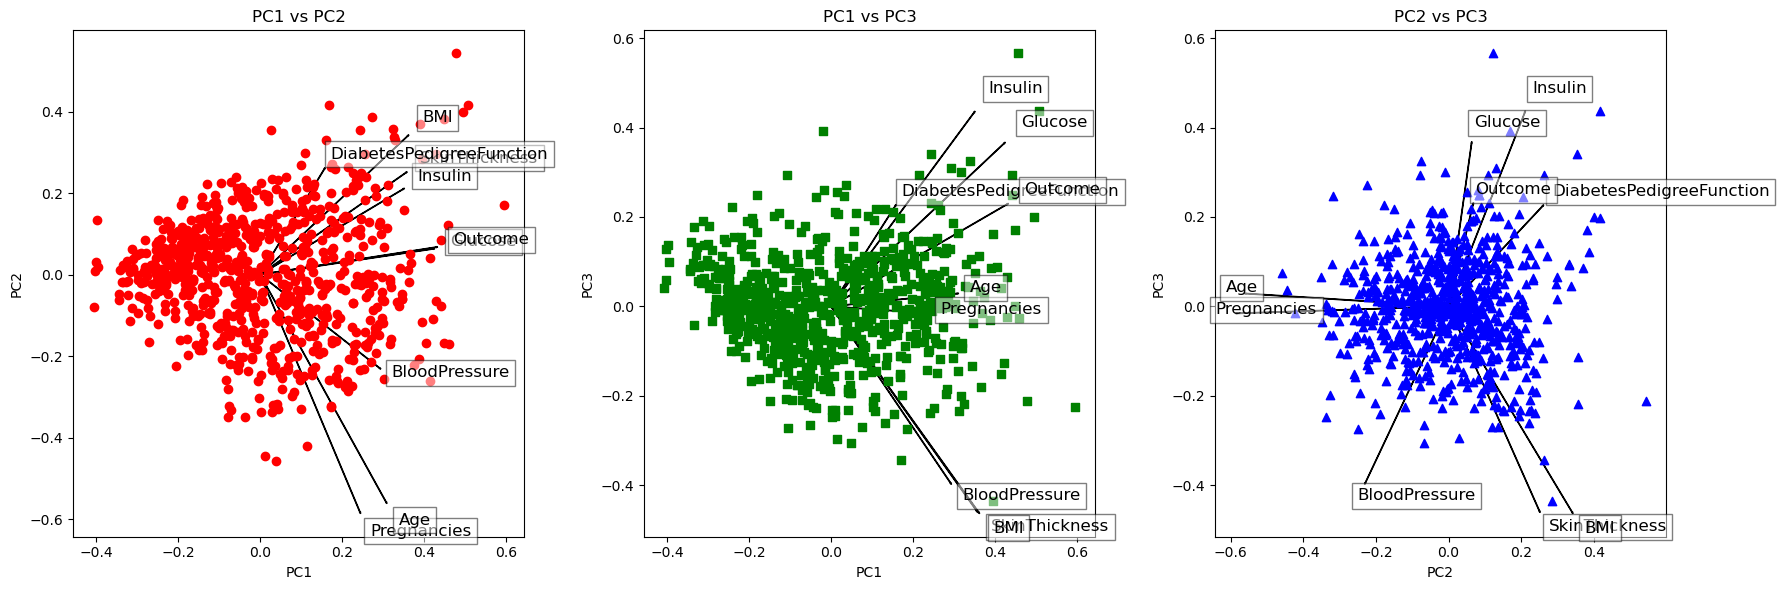

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create subplots for each pair

# Plot PC1 vs PC2
ax = axes[0]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[1, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC2 * scalePC2, c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs PC2')

# Plot PC1 vs PC3
ax = axes[1]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[2, i])
    label_x = loadings[0, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC1 * scalePC1, PC3 * scalePC3, c='g', marker='s')
ax.set_xlabel('PC1')
ax.set_ylabel('PC3')
ax.set_title('PC1 vs PC3')

# Plot PC2 vs PC3
ax = axes[2]
for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[1, i], loadings[2, i])
    label_x = loadings[1, i] * 1.1
    label_y = loadings[2, i] * 1.1
    ax.text(label_x, label_y, feature, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

ax.scatter(PC2 * scalePC2, PC3 * scalePC3, c='b', marker='^')
ax.set_xlabel('PC2')
ax.set_ylabel('PC3')
ax.set_title('PC2 vs PC3')

plt.tight_layout()
plt.show()

## Using t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [82]:
# Checking the content of features
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### Separate features and target variable

In [83]:
# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Scaling Data : Standardize the features (important for t-SNE)

In [84]:
# Standardize the features (important for t-SNE)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Apply t-SNE

In [85]:
# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)

### Using a new DataFrame for the t-SNE results (Seaborn)

In [86]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Seaborn

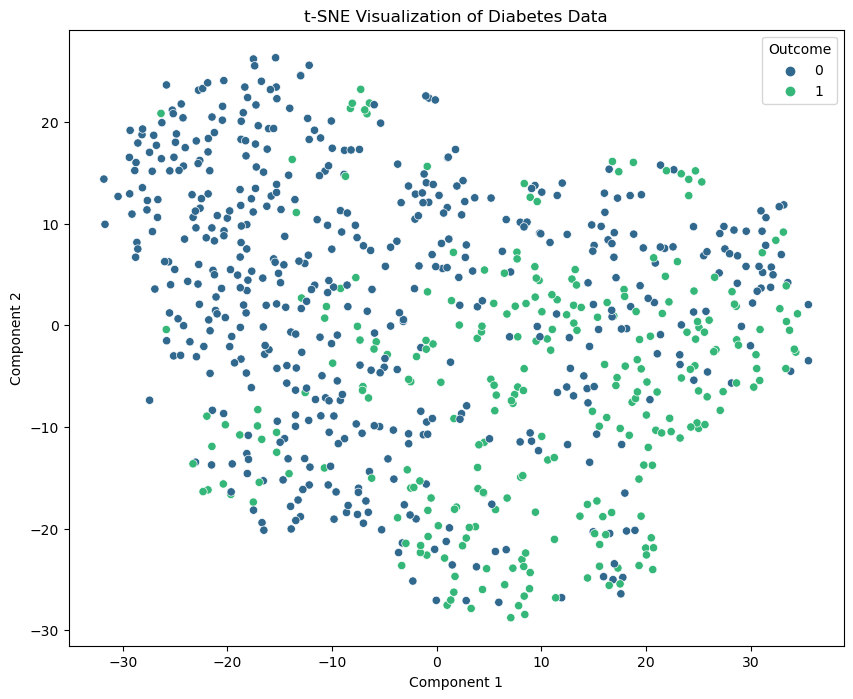

In [87]:
# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Outcome', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Diabetes Data')
plt.show()

### Using a new DataFrame for the t-SNE results (Matplotlib)

In [88]:
# Create a new DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Outcome'] = y

### Visualisation: Plot the t-SNE results using Matplotlib alone

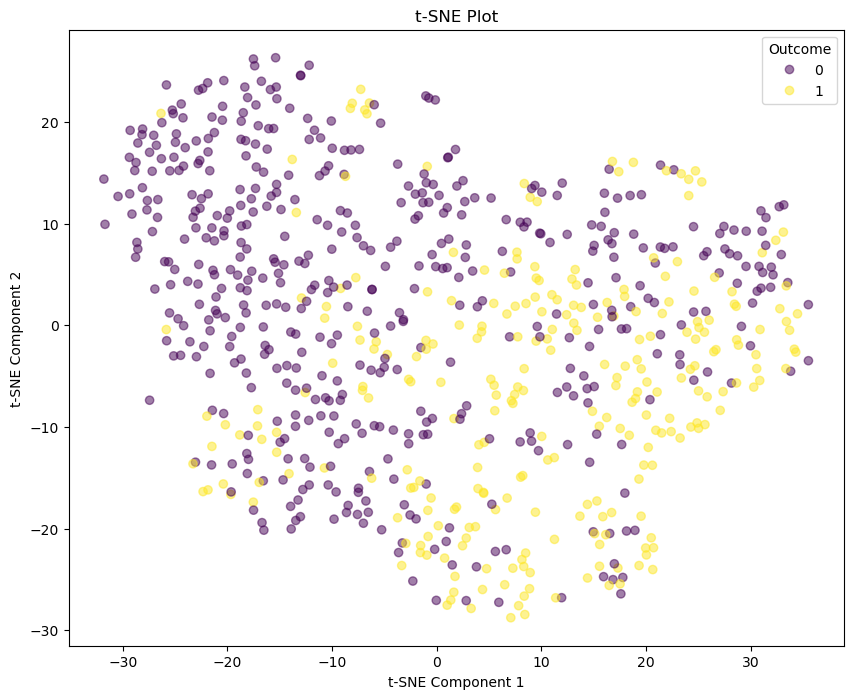

In [89]:
# Plot the t-SNE graph using plt.scatter()
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x='TSNE1', y='TSNE2', data=tsne_df, c='Outcome', cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Outcome')
plt.show()